В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



**Посилання на файл `process_bank_churn.py`:** https://github.com/OlhaKoltun/ML_course_tasks/blob/main/homework/process_bank_churn.py

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
%load_ext autoreload
%autoreload 2

from process_bank_churn import preprocess_data, preprocess_new_data

In [3]:
data_path = r'C:\Users\olha.koltun\OneDrive - Trico\ML Course\data\bank-customer-churn-prediction-dlu-course-c-2'
raw_df = pd.read_csv(os.path.join(data_path, 'train.csv'))

data = preprocess_data(raw_df, scale_numeric=False)

In [4]:
X_train = data['X_train']
train_targets = data['train_targets']
X_val = data['X_val']
val_targets = data['val_targets']
input_cols = data['input_cols']
scaler = data['scaler'],
encoder = data['encoder']

In [5]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7180,682.0,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24,1.0,0.0,0.0,0.0,1.0
10393,684.0,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31,1.0,0.0,0.0,1.0,0.0
80,705.0,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01,0.0,1.0,0.0,0.0,1.0
3365,669.0,58.0,0.0,0.00,2.0,0.0,1.0,51565.98,0.0,0.0,1.0,0.0,1.0
12236,707.0,21.0,3.0,0.00,2.0,1.0,1.0,148564.76,1.0,0.0,0.0,0.0,1.0


**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

In [7]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 46.9 ms
Wall time: 36.6 ms


DecisionTreeClassifier(random_state=42)

In [8]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities
train_probs = model.predict_proba(X_train)[:, 1]
val_probs = model.predict_proba(X_val)[:, 1]

# Calculate AUC-ROC scores
train_auc = roc_auc_score(train_targets, train_probs)
val_auc = roc_auc_score(val_targets, val_probs)

# Print the results
print(f"Train AUC-ROC: {train_auc:.4f}")
print(f"Validation AUC-ROC: {val_auc:.4f}")


Train AUC-ROC: 1.0000
Validation AUC-ROC: 0.7700


**Модель показує перенавчення:**
- Train AUC-ROC: 1.0000 (ідеально на тренувальних даних)
- Validation AUC-ROC: 0.7702 (значно нижче, що вказує на погану узагальненість)

Модель занадто точно запам’ятала тренувальні дані, але погано працює на нових.

In [9]:
print(f'Tree depth: {model.tree_.max_depth}')

Tree depth: 26


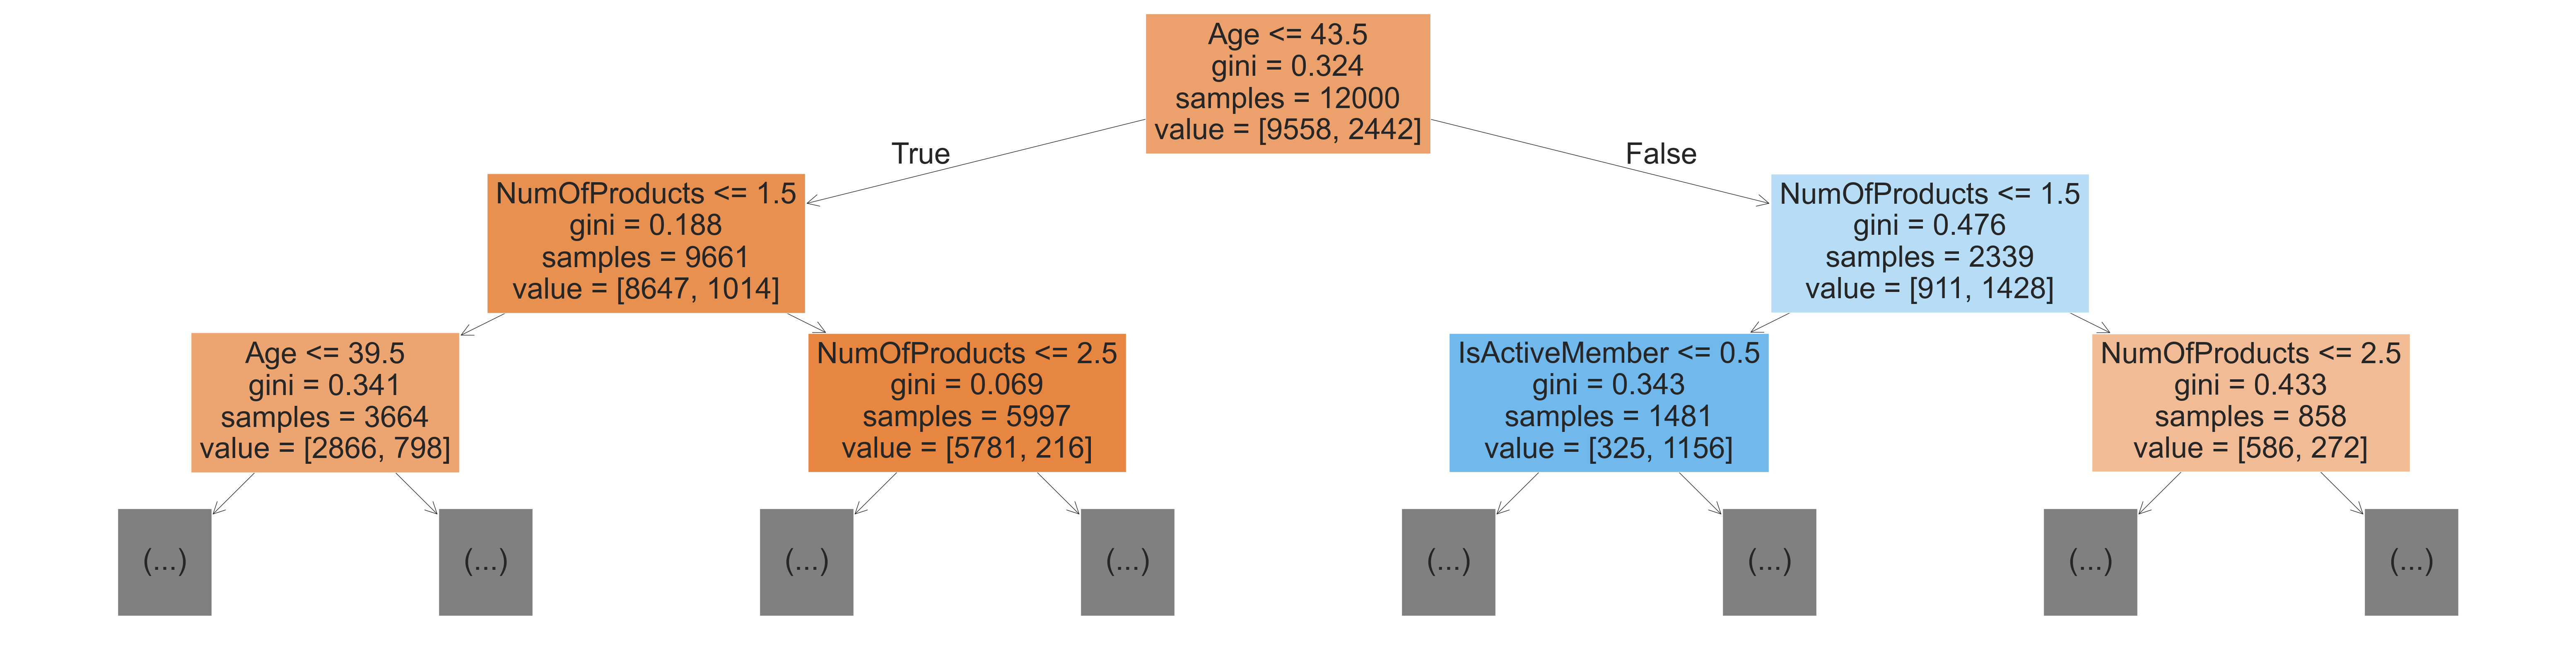

In [10]:
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

**Найвпливовіші ознаки:**
- Age
- NumOfProducts

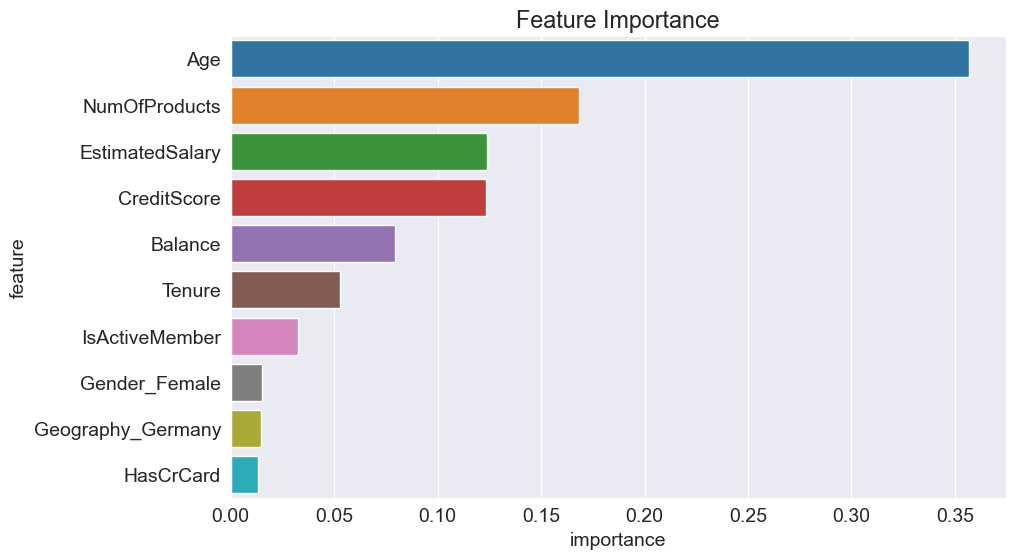

In [11]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [12]:
md = 5
max_leaf = 200

model = DecisionTreeClassifier(max_depth=md, max_leaf_nodes=max_leaf, random_state=42)
model.fit(X_train, train_targets)
    
train_probs = model.predict_proba(X_train)[:, 1]
val_probs = model.predict_proba(X_val)[:, 1]
    
train_auc = roc_auc_score(train_targets, train_probs)
val_auc = roc_auc_score(val_targets, val_probs)
    
print(f'Train AUROC: {train_auc}, Validation AUROC: {val_auc}')

Train AUROC: 0.9256944626530315, Validation AUROC: 0.9219267439467729


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [13]:
def evaluate_tree_params(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    
    train_probs = model.predict_proba(X_train)[:, 1]
    val_probs = model.predict_proba(X_val)[:, 1]
    
    train_auc = roc_auc_score(train_targets, train_probs)
    val_auc = roc_auc_score(val_targets, val_probs)
    
    return {'Max Depth': md, 'Train AUROC': train_auc, 'Validation AUROC': val_auc}

# Evaluate different max_depth
tree_results = pd.DataFrame([
    evaluate_tree_params(md) 
    for md in range(1, 21) 
])

# Display the best parameters based on validation AUROC
best_results = tree_results.sort_values(by='Validation AUROC', ascending=False).head()
print(best_results)


   Max Depth  Train AUROC  Validation AUROC
4          5     0.925694          0.921927
5          6     0.933778          0.921111
6          7     0.941535          0.914449
3          4     0.911281          0.911264
7          8     0.949541          0.902790


In [14]:
tree_results.style.background_gradient(subset='Validation AUROC', cmap='Blues')

,Max Depth,Train AUROC,Validation AUROC
0,1,0.744727,0.734865
1,2,0.842908,0.846496
2,3,0.897184,0.891146
3,4,0.911281,0.911264
4,5,0.925694,0.921927
5,6,0.933778,0.921111
6,7,0.941535,0.914449
7,8,0.949541,0.902790
8,9,0.959079,0.884709
9,10,0.969765,0.848436


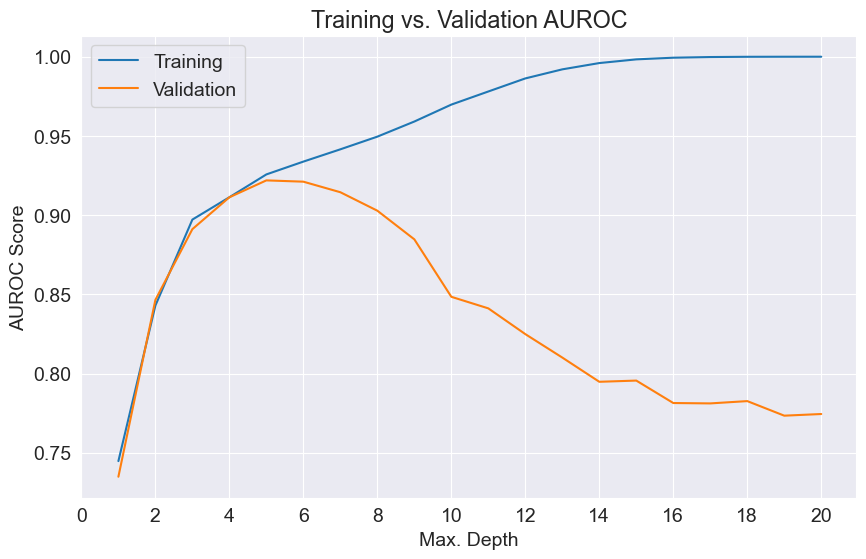

In [15]:
plt.figure()
plt.plot(tree_results['Max Depth'], tree_results['Train AUROC'])
plt.plot(tree_results['Max Depth'], tree_results['Validation AUROC'])
plt.title('Training vs. Validation AUROC')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('AUROC Score')
plt.legend(['Training', 'Validation']);

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [16]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, train_targets)

new_data = pd.read_csv(os.path.join(data_path, 'test.csv'))
new_data = new_data.drop(columns=['CustomerId', 'Surname'])

preprocessed_new_data = preprocess_new_data(new_data, encoder)
new_input_cols = [col for col in preprocessed_new_data.columns if col != 'id']

preprocessed_new_data['Exited'] = model.predict_proba(preprocessed_new_data[new_input_cols])[:, 1]

preprocessed_new_data.head()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,15000,584.0,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86,0.0,1.0,0.0,0.0,1.0,0.237911
1,15001,551.0,39.0,5.0,0.00,2.0,1.0,1.0,67431.28,1.0,0.0,0.0,0.0,1.0,0.027613
2,15002,706.0,43.0,8.0,0.00,2.0,1.0,0.0,156768.45,1.0,0.0,0.0,0.0,1.0,0.027613
3,15003,717.0,45.0,3.0,0.00,1.0,1.0,1.0,166909.87,0.0,0.0,1.0,0.0,1.0,0.770925
4,15004,592.0,43.0,8.0,0.00,2.0,1.0,1.0,143681.97,0.0,0.0,1.0,0.0,1.0,0.027613


In [17]:
submission_df = pd.read_csv(os.path.join(data_path, 'sample_submission.csv'))

submission_df['Exited'] = preprocessed_new_data.set_index('id').loc[submission_df['id'], 'Exited'].values

print('First 5 rows of the submission file:')
print(submission_df.head())

submission_df.to_csv(os.path.join(data_path, 'submission_log_reg.csv'), index=False)
print('Submission file saved as submission_log_reg.csv. Ready for upload to Kaggle!')


First 5 rows of the submission file:
      id    Exited
0  15000  0.237911
1  15001  0.027613
2  15002  0.027613
3  15003  0.770925
4  15004  0.027613
Submission file saved as submission_log_reg.csv. Ready for upload to Kaggle!


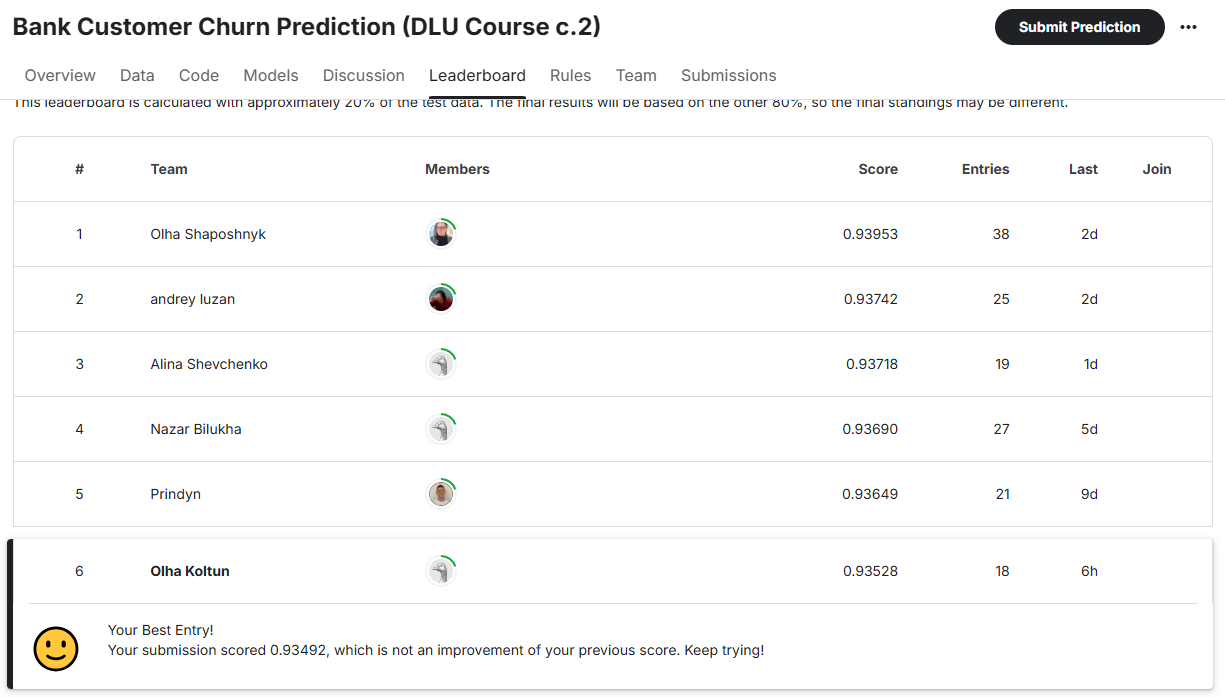